# Visualizing the OLS cost function, L1, L2 constraints


#### Libraries

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
#()
%matplotlib inline
plt.style.use('seaborn-white')

#### Creating the data set

In [7]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
print(x)
noise = 1*np.random.uniform(  size = 40)
print(noise)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

[0.         0.02564103 0.05128205 0.07692308 0.1025641  0.12820513
 0.15384615 0.17948718 0.20512821 0.23076923 0.25641026 0.28205128
 0.30769231 0.33333333 0.35897436 0.38461538 0.41025641 0.43589744
 0.46153846 0.48717949 0.51282051 0.53846154 0.56410256 0.58974359
 0.61538462 0.64102564 0.66666667 0.69230769 0.71794872 0.74358974
 0.76923077 0.79487179 0.82051282 0.84615385 0.87179487 0.8974359
 0.92307692 0.94871795 0.97435897 1.        ]
[0.84888064 0.57854252 0.00845108 0.77874921 0.09859895 0.04808222
 0.36836259 0.76872789 0.20826348 0.08126035 0.71852204 0.37667208
 0.57885814 0.37049948 0.82741039 0.57310338 0.47425146 0.49026418
 0.60685784 0.64768168 0.95075122 0.75097219 0.13015752 0.72154298
 0.32372749 0.26347204 0.77665348 0.94713703 0.97191697 0.56358964
 0.63596979 0.87985616 0.99334674 0.66048434 0.63274077 0.70291705
 0.75787407 0.41533813 0.94544605 0.61425995]


#### Helper functions

In [8]:
def xpowy(x,y):
    retVal = 1
    while(y > 0):
        if(y&1 == 1):
             retVal = retVal * x
        y = y >> 1
        x = x*x
    return retVal

def costL1(x,y):
    #The L1 cost function
    return np.abs(x) + np.abs(y)

def costL2(x,y):
    #The L2 cost function
    return xpowy(x,2) + xpowy(y,2)

def costFunction(X,y,theta):
    #Cost function.
    m = np.size(y) 
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;

def closedFormSolution(X,y):
    #Computing the closed form solution.
    return np.linalg.inv(X.T @ X) @ X.T @ y
    
def closedFormRegSolution(X,y,lamda = 10): 
    '''Ridge regression closed form solution'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]

#### Computing the Ridge regularization solutions as a function of $\lambda$

In [9]:
lambda_range = np.logspace(0,4,num = 100)/1000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for l in lambda_range:
    t0, t1 = closedFormRegSolution(X,y_noise,l)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

#### Computing the Lasso regularization solutions as a function of $\lambda$

In [10]:
lambda_range = np.logspace(0,2,num = 100)/1000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    t0, t1 = model_sk_reg.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

#### Plotting the results

<ipython-input-14-4a9b5895fba5>:25: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
<ipython-input-14-4a9b5895fba5>:26: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
<ipython-input-14-4a9b5895fba5>:44: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
<ipython-input-14-4a9b5895fba5>:45: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')


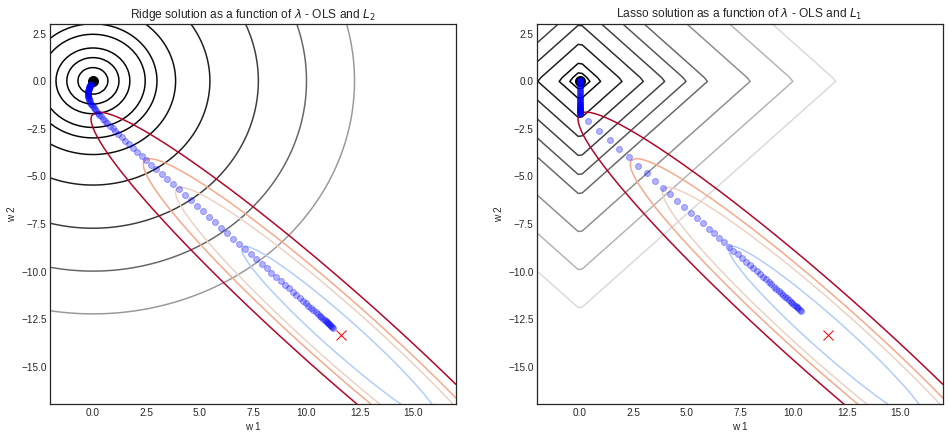

In [14]:
#Setup of meshgrid of w values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each w combination
zz_l2 = np.array(  [costL2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [costL1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costFunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T @ X) @X.T @ y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
#Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, linestyle = 'none', marker = 'o', color = 'blue', alpha = .3)
###############################################


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
#Plotting the path of L1 regularized minimum
ax.plot(theta_0_list_reg_l1,theta_1_list_reg_l1, linestyle = 'none', marker = 'o', color = 'blue', alpha = .3)
###############################################


plt.show()


The Lasso L1 term provides a much more aggressive regularization because the intersection between the constraint function and the cost function happens at the “vertices” of the diamond where either/or each variable is equal to zero. The effect of such regularization is to “cancel” out each variable, and by varying λ we can test the impact of each variable on the model. In effect this is automatic
variable selection. On the other hand, Ridge regression provides a less
aggressive form of regularization where the coefficients tend to zero in the
limit only. As is clearly observable from the above plots, the output changes gradually for the L2 norm, unlike for the L1 norm. The Ridge regression decreases the complexity of a model but does not reduce the number of variables as for no term is there a zero coefficient. It's just small enough to be neglected. The model decreases the value of the coefficient of the 'outlier' terms in order to mitigate the loss.
